In [5]:
# %load 'AE_2nd_prep.py'


# In[2]:


# %load AE_2nd_prep.py


# In[1]:


import gzip, pickle

G_f_src = "AE1_out.pkl.gz"
G_f_tar = "AE2_in.pkl.gz"

def load_data(fn):
    with gzip.open(fn) as f:
        return pickle.load(f)
    
def save_data(d, fn):
    with gzip.open(fn, "w") as f:
        pickle.dump(d, f)


# In[2]:


(G_k, G_x, G_y) = load_data(G_f_src)


# In[3]:


import pandas as pd
from pandas import DataFrame as df

def encode_to_df(k, x, y):
    x_all = dict()
    y_all = dict()
    
    for k_1, x_1, y_1 in zip(k, x, y):
        c_1, d_1 = k_1
        
        if d_1 not in x_all:
            x_all[d_1] = dict()
            y_all[d_1] = dict()
        
        x_all[d_1][c_1] = x_1
        y_all[d_1][c_1] = y_1
        
    x_df = df.from_dict(x_all)
    y_df = df.from_dict(y_all)
   
    return x_df, y_df


# In[4]:


G_x_df, G_y_df = encode_to_df(G_k, G_x, G_y)


# In[5]:


def is_nan_in_df(df_all):
    cols = df_all.columns
    for cn_1 in cols:
        for c_1, x_1 in df_all[cn_1].iteritems():
            if (len(x_1) < 10):
                print ("Missing in %s, %s" % (cn_1, c_1))
                return True
    return False


# In[6]:


is_nan_in_df(G_x_df)


# In[7]:


import numpy as np

# (date, code, encoded_num) => (date, encoded_num, code)
def dim_convert(df_x):
    d_s = df_x.columns
    c_s = df_x.index
    
    x_all = dict()
    for d_1 in d_s:
        
        x_1 = list()
        ind = 0
        for c_1 in c_s:
            x_1.append(df_x[d_1][c_1])
        
        x_all[d_1] = dict()
        x_t = np.transpose(x_1)
        for i in range(len(x_t)):
            x_all[d_1][i] = x_t[i]
    
    return df.from_dict(x_all, orient='index')


# In[8]:


G_x_df_T = dim_convert(G_x_df)


# In[9]:


print (G_x_df_T.columns)
print (G_x_df_T.index)


# In[10]:


G_data_ae3 = (G_x_df_T, G_y_df)
save_data(G_data_ae3, G_f_tar)




Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
           dtype='int64')
DatetimeIndex(['2010-02-01', '2010-02-02', '2010-02-03', '2010-02-04',
               '2010-02-05', '2010-02-08', '2010-02-09', '2010-02-10',
               '2010-02-11', '2010-02-12',
               ...
               '2017-10-13', '2017-10-16', '2017-10-17', '2017-10-18',
               '2017-10-19', '2017-10-20', '2017-10-23', '2017-10-24',
               '2017-10-25', '2017-10-26'],
              dtype='datetime64[ns]', length=1913, freq=None)


dim = (139, 51651)
Nodes: 139 -> 103 -> 49
Starting Loss: 0.239582
Epoch 1: Testing Loss: 0.235606
Epoch 1: Testing Loss: 0.043392
Epoch 1: Minibatch Loss: 0.040155
Epoch 2: Testing Loss: 0.037782
Epoch 2: Minibatch Loss: 0.037819
Epoch 3: Minibatch Loss: 0.034911
Epoch 4: Minibatch Loss: 0.032582
Epoch 5: Testing Loss: 0.031744
Epoch 5: Minibatch Loss: 0.030906
Epoch 6: Minibatch Loss: 0.029367
Epoch 7: Minibatch Loss: 0.028930
Epoch 8: Testing Loss: 0.028004
Epoch 8: Minibatch Loss: 0.028812
Epoch 9: Minibatch Loss: 0.026913
Epoch 10: Minibatch Loss: 0.027129
Epoch 11: Minibatch Loss: 0.025249
Epoch 12: Minibatch Loss: 0.025026
Epoch 13: Testing Loss: 0.025214
Epoch 13: Minibatch Loss: 0.024712
Epoch 14: Minibatch Loss: 0.023588
Epoch 15: Minibatch Loss: 0.024530
Epoch 16: Minibatch Loss: 0.024080
Epoch 17: Minibatch Loss: 0.024751
Epoch 18: Testing Loss: 0.023891
Epoch 18: Minibatch Loss: 0.023617
Epoch 19: Minibatch Loss: 0.022966
Epoch 20: Minibatch Loss: 0.023404
Epoch 21: Miniba

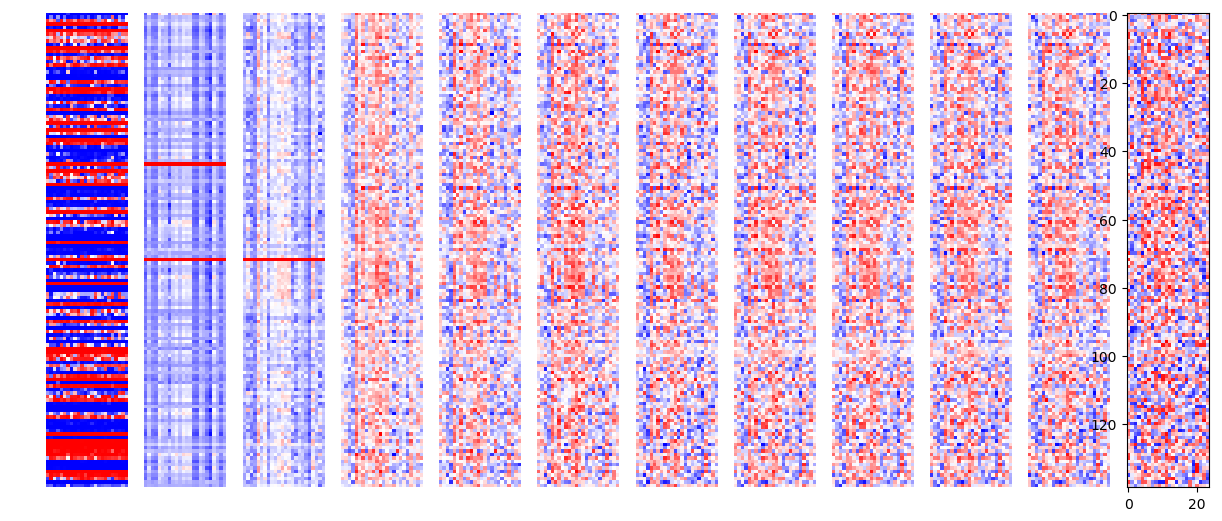

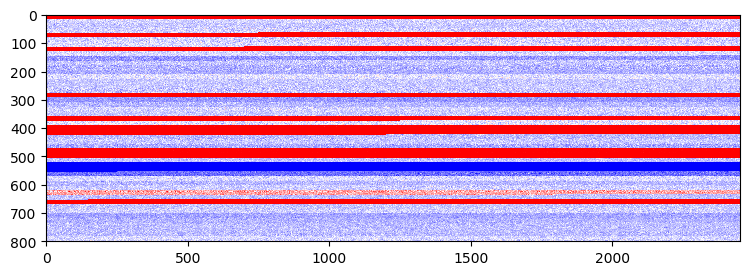

/home/wooyang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2247: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


Normalization dim = (51651, 49) -> (51651, 36)


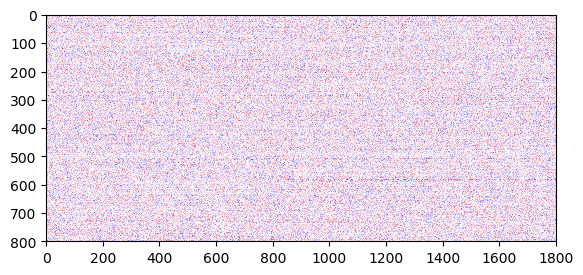

DatetimeIndex(['2010-02-01', '2010-02-02', '2010-02-03', '2010-02-04',
               '2010-02-05', '2010-02-08', '2010-02-09', '2010-02-10',
               '2010-02-11', '2010-02-12',
               ...
               '2017-10-13', '2017-10-16', '2017-10-17', '2017-10-18',
               '2017-10-19', '2017-10-20', '2017-10-23', '2017-10-24',
               '2017-10-25', '2017-10-26'],
              dtype='datetime64[ns]', length=1913, freq=None)
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
           dtype='int64')


In [6]:
# %load 'AE_2nd_main.py'


# In[1]:


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# In[2]:


import gzip, pickle

G_f_src = "AE2_in.pkl.gz"
G_f_tar = "AE2_out.pkl.gz"

def load_data(fn):
    with gzip.open(fn) as f:
        return pickle.load(f)
    
def save_data(d, fn):
    with gzip.open(fn, "w") as f:
        pickle.dump(d, f)


# In[20]:


(G_x, G_y) = load_data(G_f_src)


# In[59]:



def flatten_x(x):
    k_flat = list()
    x_flat = list()

    for d, r in x.iterrows():
        for z, l in r.iteritems():
            k = (z, d)
            k_flat.append( k )
            x_flat.append( l )
    
    return k_flat, x_flat


# In[61]:


G_k_flat, G_x_flat = flatten_x(G_x)


# In[62]:


import copy, math

n = len(G_x_flat)
num_input = len(G_x_flat[0])
print ("dim = (%d, %d)" % (num_input, n))

data_tr = copy.deepcopy(G_x_flat)
data_te = copy.deepcopy(data_tr[:512])


# In[63]:



# Training Parameters
learn_rate = 0.003
num_epoch  = 50
batch_size = 64
num_batch  = int (n / batch_size)

# Network Parameters
num_hidden_1 = int(num_input * 2.3 / 3.1) # 1st layer num features
num_hidden_2 = int(num_input * 2.9 / 8.1) # 2nd layer num features (the latent dim)

print ("Nodes: %d -> %d -> %d" % (num_input,num_hidden_1,num_hidden_2))



# In[64]:



# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def normalize(x):
    x_norm = tf.nn.sigmoid(x)
    return x_norm

def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
X_norm     = normalize(X)
encoder_op = encoder(X_norm)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X_norm

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.AdamOptimizer(learn_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()



# In[65]:



# Start Training
# Start a new TF session
with tf.Session() as sess:
    
    # Run the initializer
    sess.run(init)
    after_l = list()

    epoch_loss = sess.run(loss, feed_dict={X: G_x_flat})
    print('Starting Loss: %f' % (epoch_loss))
    
    # Training
    for epoch in range(1, num_epoch+1):
        
        np.random.shuffle(data_tr)
        
        for i in range(num_batch):
            batch_x = data_tr[i*batch_size:(i+1)*batch_size]
           
            # Run optimization op (backprop) and cost op (to get loss value)
            _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
            
            steps = (epoch-1) * num_batch + i
            #if (int(math.sqrt(epoch))**2 == epoch) or (epoch == num_epoch):
            if (((int(math.sqrt(steps / 400.0))**2)*400)==steps):
                before, after, l = sess.run([X_norm, decoder_op, loss], feed_dict={X: data_te})
                print('Epoch %i: Testing Loss: %f' % (epoch, l))
                after_l.append(after)

        print('Epoch %i: Minibatch Loss: %f' % (epoch, l))

    G_x_enc, epoch_loss = sess.run([encoder_op, loss], feed_dict={X: G_x_flat})
    print('Final Loss: %f' % (epoch_loss))




# In[66]:


n_after = len(after_l)
fig = plt.figure(figsize=(n_after+4,20), dpi=100)
for i in range(n_after):
    a = fig.add_subplot(1, n_after+1, i+1)
    plt.imshow(after_l[i][:24].T, origin="upper", cmap="bwr")
    plt.axis('off')

a = fig.add_subplot(1, n_after+1, n_after+1)
plt.imshow(before[:24].T, origin="upper", cmap="bwr")
plt.axis('on')
plt.show()


# In[67]:


plt.figure(figsize=(10,3), dpi=100)
plt.imshow(G_x_enc[:40000].T.reshape(800,-1), origin="upper", cmap="bwr")
plt.show()


# In[68]:


from scipy import stats

def normalize_enc(enc):
    enc_T = np.transpose(enc)
    enc_T_new = list()
    
    for T in enc_T:
        T_new = stats.zscore(T)
        for i in range(len(T_new)):
            if (T_new[i] > 5.0):
                T_new[i] = 5.0
            elif (T_new[i] < -5.0):
                T_new[i] = -5.0
                
        T_new_sum = sum(T_new)
        #print(T_new_sum)
        if (T_new_sum < 1.0) and (T_new_sum > -1.0):
            enc_T_new.append(T_new)
            
    return np.transpose(enc_T_new)



# In[69]:


G_x_norm = normalize_enc(G_x_enc)
print ("Normalization dim = (%d, %d) -> (%d, %d)" % (len(G_x_enc), len(G_x_enc[0]), len(G_x_norm), len(G_x_norm[0])))

plt.figure(figsize=(10,3), dpi=100)
plt.imshow(G_x_norm[:40000].T.reshape(800,-1), origin="upper", cmap="bwr")
plt.show()



# In[75]:



#import pandas as pd
from pandas import DataFrame as df

def encode_to_df(k, x):
    x_all = dict()
    
    for k_1, x_1 in zip(k, x):
        z_1, d_1 = k_1
        
        if d_1 not in x_all:
            x_all[d_1] = dict()
        
        x_all[d_1][z_1] = x_1
        
    x_df = df.from_dict(x_all)
   
    return x_df


# In[76]:


G_x_out = encode_to_df(G_k_flat, G_x_norm)


# In[78]:


def is_nan_in_df(df_all):
    cols = df_all.columns
    for cn_1 in cols:
        for c_1, x_1 in df_all[cn_1].iteritems():
            if (len(x_1) < 10):
                print ("Missing in %s, %s" % (cn_1, c_1))
                return True
    return False


# In[80]:


is_nan_in_df(G_x_out)



# In[81]:


print (G_x_out.columns)
print (G_x_out.index)

G_data_out = (G_x_out, G_y)
save_data(G_data_out, G_f_tar)

